In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_auc_score
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score


df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [32]:
df.shape

(284807, 31)

In [33]:
df.isna().sum().count()

31

Text(0, 0.5, ' ')

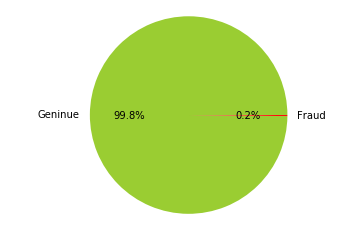

In [34]:
fig, ax = plt.subplots(1,1)
ax.pie(df.Class.value_counts(), autopct='%1.1f%%', labels = ['Geninue', 'Fraud'], colors=['yellowgreen', 'r'])
plt.axis('equal')
plt.ylabel(' ')

Time Variable: 


Text(0.5, 1.0, 'Fraud')

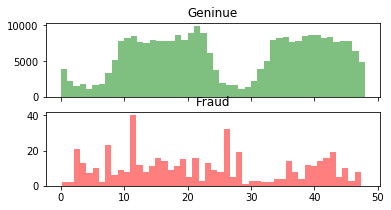

In [35]:
print("Time Variable: ")
df['Time_Hr'] = df['Time']/3600
df.drop(['Time'], axis=1, inplace=True)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(6,3))
ax1.hist(df.Time_Hr[df['Class'] == 0], bins=48, color='g', alpha=0.5)
ax1.set_title("Geninue")

ax2.hist(df.Time_Hr[df['Class']==1], bins=48, color='r', alpha=0.5)
ax2.set_title('Fraud')

Text(0, 0.5, '#Transactions')

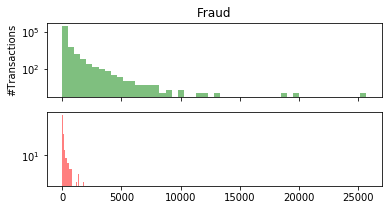

In [39]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex=True, figsize=(6,3))
ax3.hist(df.Amount[df['Class']==0], bins=50, color='g', alpha=0.5)
ax3.set_yscale('log')
ax3.set_title('Geninue')
ax3.set_ylabel("#Transactions")
ax4.hist(df.Amount[df['Class']==1], bins=50, color='r', alpha=0.5)
ax4.set_yscale('log')
ax3.set_title('Fraud')
ax3.set_ylabel("#Transactions")

In [47]:
from sklearn.preprocessing import StandardScaler
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


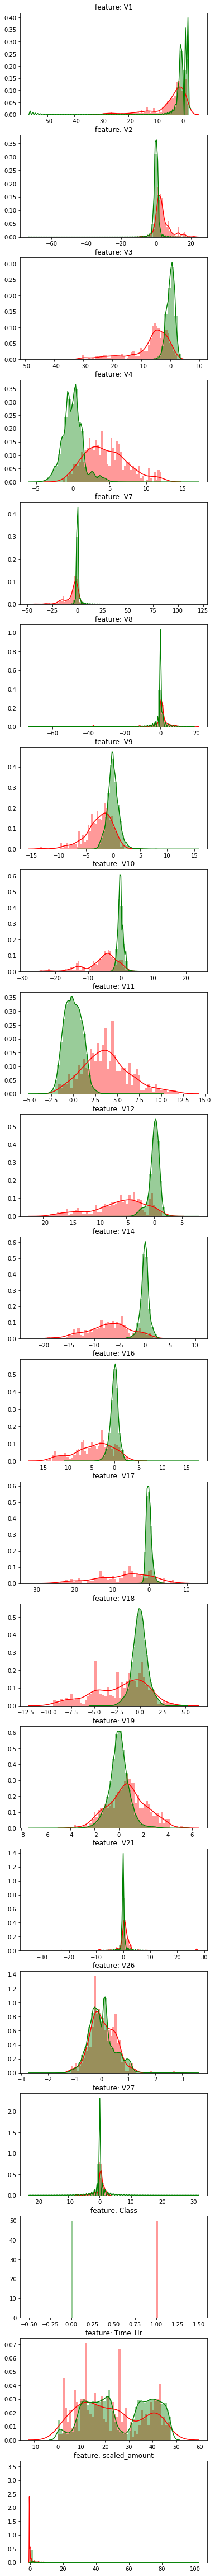

In [62]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6, 28*4))


for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [63]:
from sklearn.model_selection  import train_test_split

def split_data(df, drop_list):
    df = df.drop(drop_list, axis=1, inplace=True)
    print(df.columns)
    
    
    y= df['Class'].values
    X = df.drop(['Class'], axis=1)